# Abalone Case Study

Problem Statement: The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

# Importing the Dataset:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [9]:
data.sample()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
77,F,0.6,0.47,0.15,0.922,0.363,0.194,0.305,10


In [10]:
# indexes at axis=1
type(data.columns)

pandas.core.indexes.base.Index

In [11]:

data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict.



# Name / Data Type / Measurement Unit / Description


Sex / nominal / -- / M, F, and I (infant) Length / continuous / mm / Longest shell measurement Diameter / continuous / mm / perpendicular to length Height / continuous / mm / with meat in shell Whole weight / continuous / grams / whole abalone Shucked weight / continuous / grams / weight of meat Viscera weight / continuous / grams / gut weight (after bleeding) Shell weight / continuous / grams / after being dried Rings / integer / -- / +1.5 gives the age in years

# Checking Null Values in the dataframe.

In [12]:

data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# imputation

*categorical column==> mode

*continuous column==> mean/medain

df.fillna()

This process have done when there is null values is present. since there are no null values then we can proceed

In [13]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [14]:

data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [15]:

data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [16]:
data['Rings'].nunique()

28

In [17]:
data.shape[0]

4177

we will check whethere a space or a blank value present in the target virable

In [18]:
data.loc[data['Rings']==" "]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


After some observation, we saw that there is no space as the value.

Making DataFrame for the Nominal Data

In [19]:
data_visualization_nominal=data[['Sex']].copy()

In [20]:
data_visualization_nominal.columns

Index(['Sex'], dtype='object')

# Visualization of the Data:

In [21]:
import seaborn as sns

For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns:

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


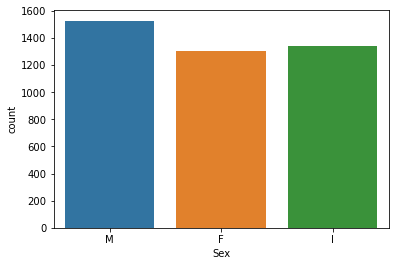

In [22]:

ax=sns.countplot(x='Sex',data=data_visualization_nominal)
print(data_visualization_nominal['Sex'].value_counts())

from the above observation the total number of M is 1528, total number of I is 1342 and total number of F is 1307.

Checking the distribution of the continuous values of the float type columns.

In [23]:
data_visualization_continuous=data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight','Rings']].copy()

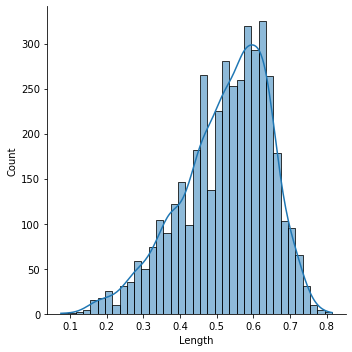

In [24]:
import seaborn as sns
sns.displot(data_visualization_continuous['Length'],kde=True)

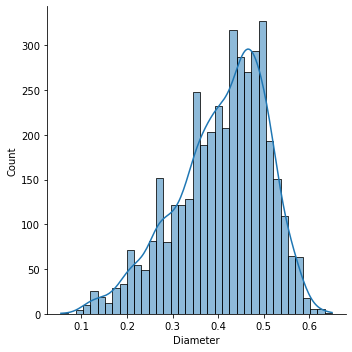

In [25]:

sns.displot(data_visualization_continuous['Diameter'],kde=True)

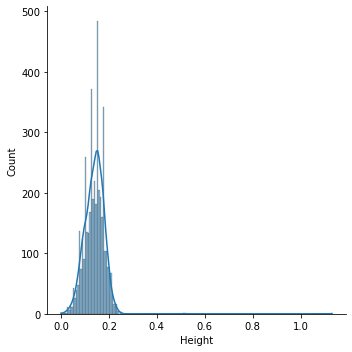

In [26]:
sns.displot(data_visualization_continuous['Height'],kde=True)

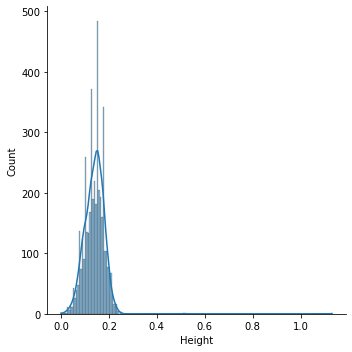

In [27]:
sns.displot(data_visualization_continuous['Height'],kde=True)

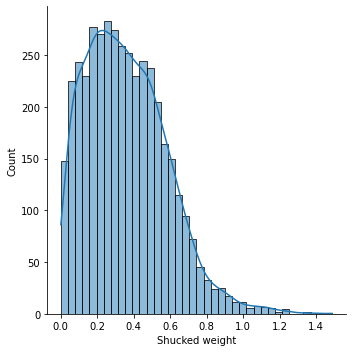

In [28]:

sns.displot(data_visualization_continuous['Shucked weight'],kde=True)

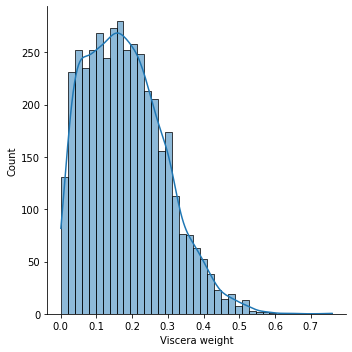

In [29]:

sns.displot(data_visualization_continuous['Viscera weight'],kde=True)

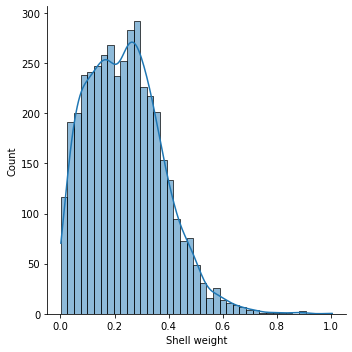

In [30]:
sns.displot(data_visualization_continuous['Shell weight'],kde=True)

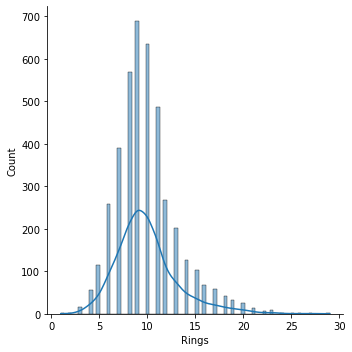

In [31]:
sns.displot(data_visualization_continuous['Rings'],kde=True)

visualization part is completed.

# Encoding of DataFrame:

In [32]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [33]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [34]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Describe the dataset:

Describe the dataset:

In [35]:
# only continuous columns
data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:>

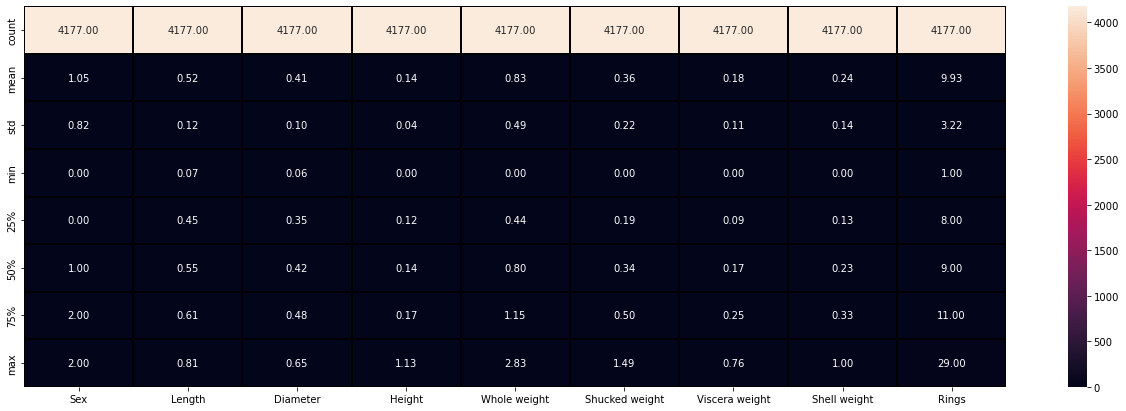

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(data.describe(),annot=True,linewidths=0.1,linecolor='black',fmt="0.2f")

# Correlation of the columns with the target columns:

In [37]:
data.corr()['Rings'].sort_values()

Sex              -0.034627
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

<AxesSubplot:>

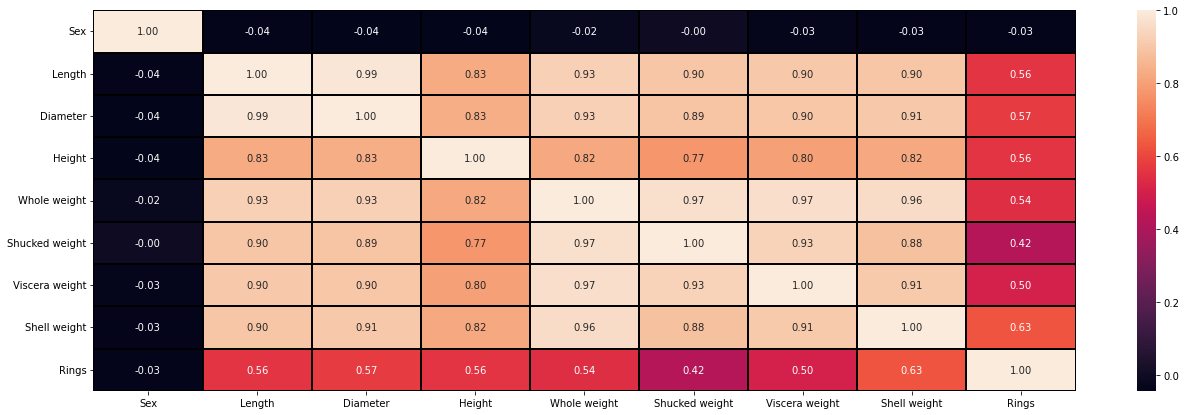

In [38]:

plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

from the above observation. we can observe that there is good correlation.

checking the columns which are positively and negative correlated with the target columns:

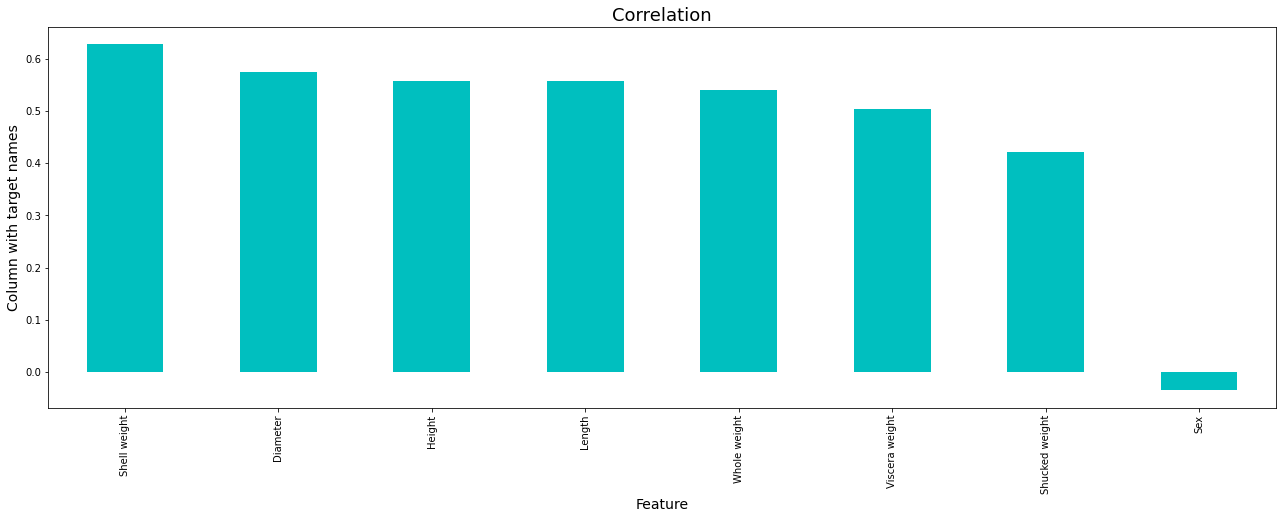

In [39]:
plt.figure(figsize=(22,7))
data.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()


In [40]:

data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

keeping +/-0.5 as the range for skewness,here are the columns which does not lies within this range.

In [41]:
data["Shucked weight"]=np.sqrt(data["Shucked weight"])

In [42]:
data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight   -0.141443
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

skewness have been remove

<AxesSubplot:ylabel='Frequency'>

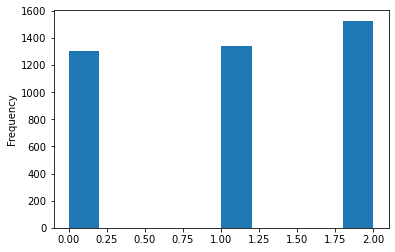

In [43]:
data['Sex'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

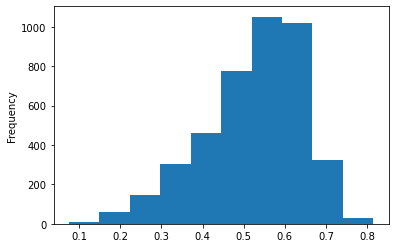

In [44]:
data['Length'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

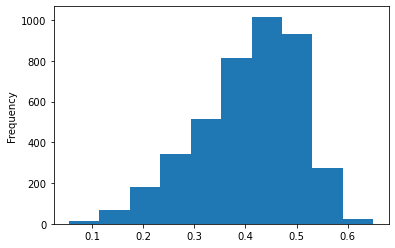

In [45]:
data['Diameter'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

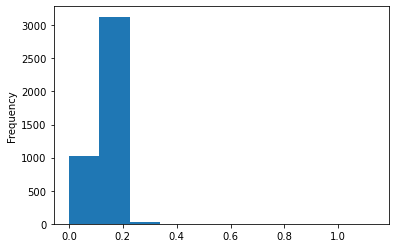

In [46]:
data['Height'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

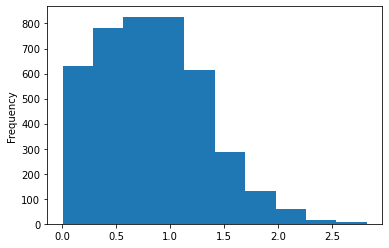

In [47]:
data['Whole weight'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

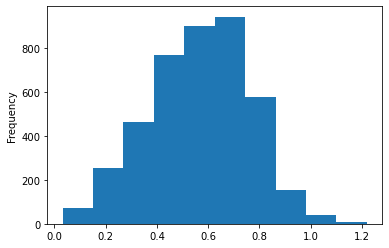

In [48]:
data['Shucked weight'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

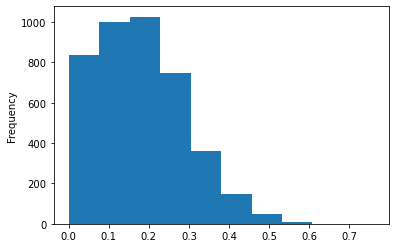

In [49]:
data['Viscera weight'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

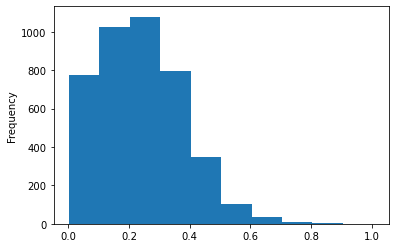

In [50]:
data['Shell weight'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

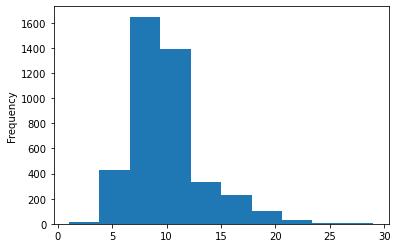

In [51]:
data['Rings'].plot.hist()

# outliers check:

In [52]:
data.dtypes

Sex               float64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

checking the outliers on the int and float type of columns.

<AxesSubplot:>

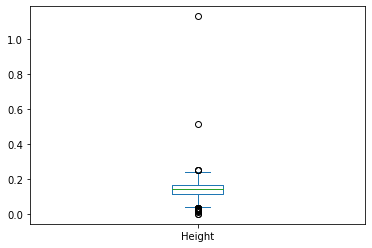

In [53]:
data['Height'].plot.box()

from the above observation. we can observe that there are outliers present.

<AxesSubplot:>

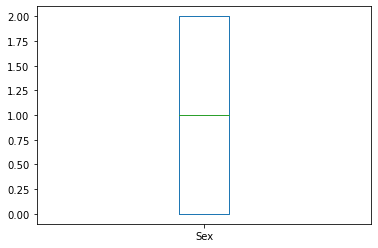

In [54]:

data['Sex'].plot.box()


from the above observation. we can observe that there is no outliers present.

<AxesSubplot:>

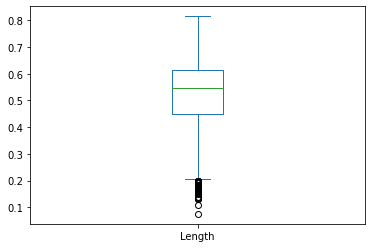

In [55]:

data['Length'].plot.box()

<AxesSubplot:>

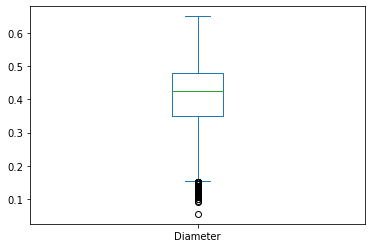

In [56]:
data['Diameter'].plot.box()

<AxesSubplot:>

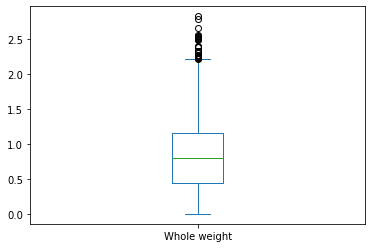

In [57]:
data['Whole weight'].plot.box()

<AxesSubplot:>

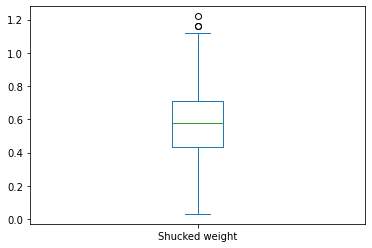

In [58]:
data['Shucked weight'].plot.box()

<AxesSubplot:>

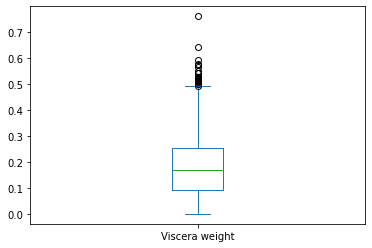

In [59]:
data['Viscera weight'].plot.box()

<AxesSubplot:>

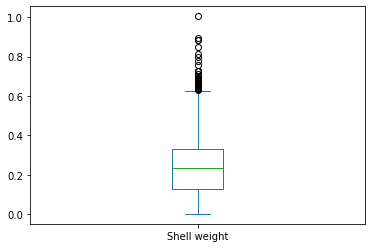

In [60]:

data['Shell weight'].plot.box()

<AxesSubplot:>

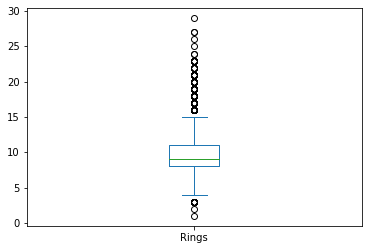

In [61]:

data['Rings'].plot.box()

Sex                  AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Length            AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Diameter          AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Height            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Whole weight      AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Shucked weight    AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Viscera weight    AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Shell weight            AxesSubplot(0.125,0.125;0.0945122x0.343182)
Rings                AxesSubplot(0.238415,0.125;0.0945122x0.343182)
dtype: object

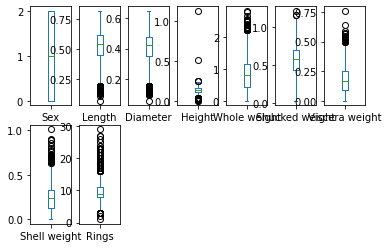

In [62]:
data.plot(kind='box',subplots=True ,layout=(2,7))

From the above observation. we can observe that there are outliers present in the dataset.

# The outlier removal

In [63]:
# removing outliers
from scipy.stats import zscore
import numpy as np

z= np.abs(zscore(data))


In [64]:
z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.151980,0.574558,0.432149,1.064424,0.641898,0.473703,0.726212,0.638217,1.571544
1,1.151980,1.448986,1.439929,1.183978,1.230277,1.282430,1.205221,1.212987,0.910013
2,1.280690,0.050033,0.122130,0.107991,0.309469,0.307012,0.356690,0.207139,0.289624
3,1.151980,0.699476,0.432149,0.347099,0.637819,0.522695,0.607600,0.602294,0.020571
4,0.064355,1.615544,1.540707,1.423087,1.272086,1.365513,1.287337,1.320757,0.910013
...,...,...,...,...,...,...,...,...,...
4172,1.280690,0.341509,0.424464,0.609334,0.118813,0.212901,0.532900,0.073062,0.330765
4173,1.151980,0.549706,0.323686,0.107991,0.279929,0.490146,0.309362,0.155685,0.020571
4174,1.151980,0.632985,0.676409,1.565767,0.708212,0.808489,0.975413,0.496955,0.289624
4175,1.280690,0.841182,0.777187,0.250672,0.541998,0.827809,0.733627,0.410739,0.020571


In [65]:
# threshold for zscore values------>above 3 are considered outliers
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  166,  166,
        167,  168,  170,  181,  232,  236,  236,  236,  237,  237,  238,
        238,  239,  270,  275,  277,  278,  294,  310,  313,  314,  334,
        351,  355,  358,  358,  362,  375,  416,  417,  428,  431,  433,
        469,  478,  480,  501,  526,  526,  530,  572,  628,  673,  674,
        675,  678,  694,  696,  696,  719,  719,  720,  720,  744,  754,
        756,  811,  891,  891, 1048, 1051, 1052, 1204, 1206, 1207, 1207,
       1207, 1209, 1209, 1257, 1417, 1422, 1427, 1427, 1428, 1429, 1429,
       1528, 1757, 1759, 1762, 1762, 1763, 1763, 1763, 1986, 1987, 1987,
       2051, 2090, 2108, 2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199,
       2201, 2208, 2209, 2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344,
       2358, 2368, 2381, 2436, 2459, 2471, 2623, 2624, 2624, 2709, 2710,
       2810, 2811, 2811, 2863, 2863, 3008, 3140, 3148, 3149, 3149, 3151,
       3151, 3188, 3193, 3280, 3359, 3427, 3427, 3

In [66]:
data_new_z=data[(z<3).all(axis=1)]
data_new_z

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2.0,0.455,0.365,0.095,0.5140,0.473814,0.1010,0.1500,15
1,2.0,0.350,0.265,0.090,0.2255,0.315436,0.0485,0.0700,7
2,0.0,0.530,0.420,0.135,0.6770,0.506458,0.1415,0.2100,9
3,2.0,0.440,0.365,0.125,0.5160,0.464220,0.1140,0.1550,10
4,1.0,0.330,0.255,0.080,0.2050,0.299166,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.608276,0.2390,0.2490,11
4173,2.0,0.590,0.440,0.135,0.9660,0.662571,0.2145,0.2605,10
4174,2.0,0.600,0.475,0.205,1.1760,0.724914,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.728697,0.2610,0.2960,10


In [67]:
data_new_z.shape

(4045, 9)

In [68]:
#percentage loss of data:

In [69]:
Data_loss=((4177-4027)/4177)*100

In [70]:
Data_loss

3.5910940866650707

our data is becoming biased as it is not considering the case .thus, we will not remove outliers.

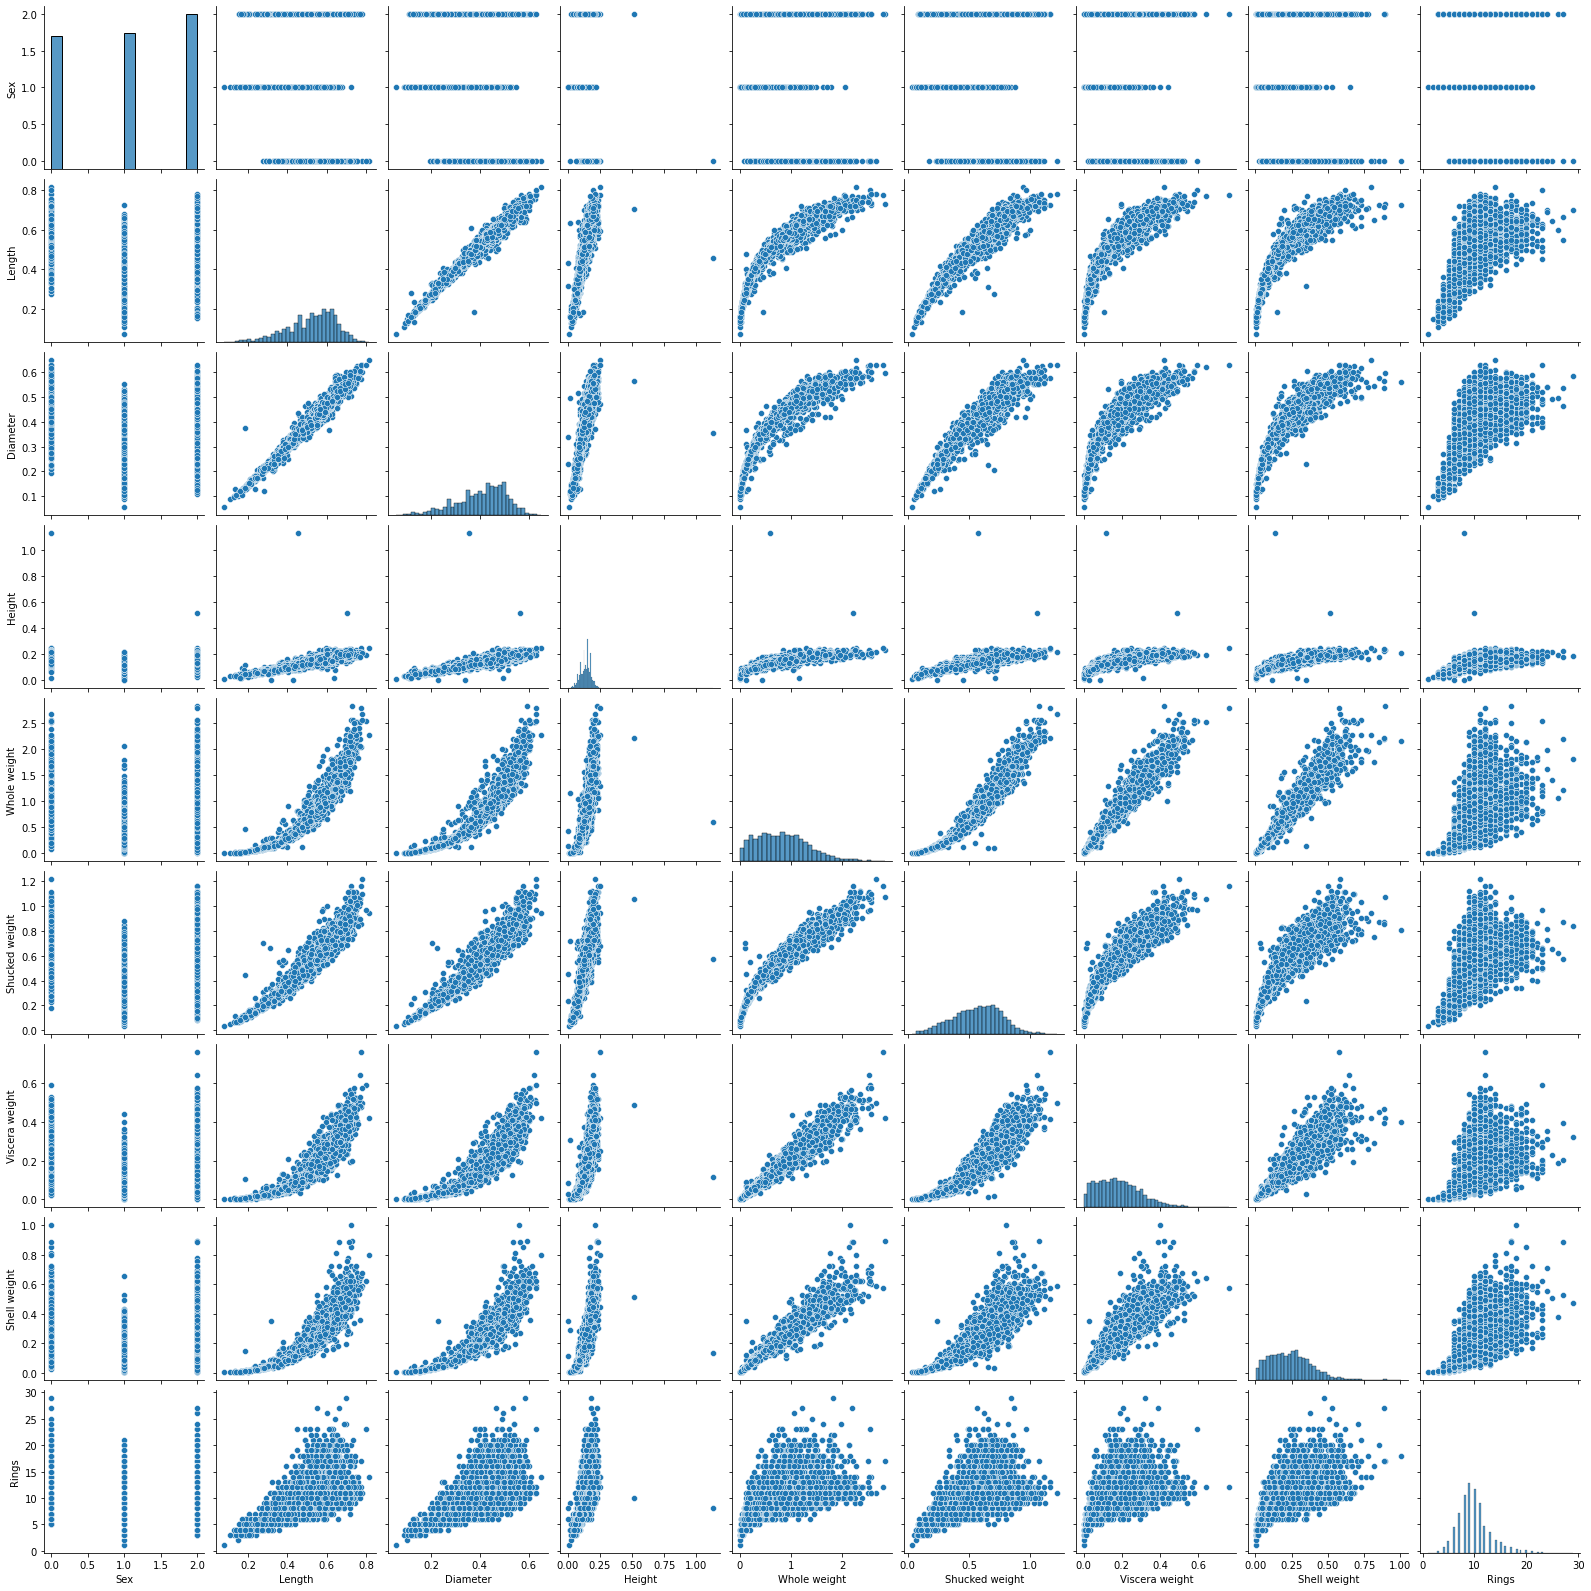

In [72]:
sns.pairplot(data)

# Separating the columns info features and target:

In [73]:
df1=pd.DataFrame(data=data)

features=df1.iloc[:,:-1]
target=df1.iloc[:,-1]

In [74]:
features=df1.drop("Rings",axis=1)
target=df1["Rings"]

# Checking MultiCollinearity

In [76]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [77]:
features

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2.0,0.455,0.365,0.095,0.5140,0.473814,0.1010,0.1500
1,2.0,0.350,0.265,0.090,0.2255,0.315436,0.0485,0.0700
2,0.0,0.530,0.420,0.135,0.6770,0.506458,0.1415,0.2100
3,2.0,0.440,0.365,0.125,0.5160,0.464220,0.1140,0.1550
4,1.0,0.330,0.255,0.080,0.2050,0.299166,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.608276,0.2390,0.2490
4173,2.0,0.590,0.440,0.135,0.9660,0.662571,0.2145,0.2605
4174,2.0,0.600,0.475,0.205,1.1760,0.724914,0.2875,0.3080
4175,0.0,0.625,0.485,0.150,1.0945,0.728697,0.2610,0.2960


In [78]:
features.shape

(4177, 8)

In [79]:
# display column -------> shape  (rows,column)--->  (768,8)

features.shape[1]  # 8 number of columns

8

In [80]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
def calc_vif(features):
    vif=pd.DataFrame()
    vif["variables"]=features.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
    return(vif)

In [82]:
features.shape

(4177, 8)

In [83]:
calc_vif(features)

,variables,VIF FACTOR
0,Sex,2.554614
1,Length,753.691090
2,Diameter,765.854044
3,Height,42.218260
4,Whole weight,267.774586
5,Shucked weight,287.271276
6,Viscera weight,63.358591
7,Shell weight,74.680814



we can see that there is MultiCollinearity present. so, we have to treat it first.

In [84]:
features=df1.drop(['Diameter'],axis=1)

In [85]:
calc_vif(features)

,variables,VIF FACTOR
0,Sex,2.558988
1,Length,202.944955
2,Height,43.259783
3,Whole weight,265.334768
4,Shucked weight,297.602097
5,Viscera weight,63.938790
6,Shell weight,74.847682
7,Rings,19.653462


After droping Diameter there is also high MultiCollinearity present.so,we have to drop one more columns whole weight



In [86]:
features=df1.drop(['Diameter','Whole weight'],axis=1)

In [87]:
calc_vif(features)

,variables,VIF FACTOR
0,Sex,2.558986
1,Length,142.433696
2,Height,42.818201
3,Shucked weight,147.769998
4,Viscera weight,32.296176
5,Shell weight,28.756236
6,Rings,19.653425


# Scaling the data using min-max Scaler:

In [88]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [89]:
import warnings
warnings.filterwarnings('ignore')

In [90]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i},the training accuracy is:-{r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-1.0
At random state 0,the testing accuracy is:- 1.0


At random state 1,the training accuracy is:-1.0
At random state 1,the testing accuracy is:- 1.0


At random state 2,the training accuracy is:-1.0
At random state 2,the testing accuracy is:- 1.0


At random state 3,the training accuracy is:-1.0
At random state 3,the testing accuracy is:- 1.0


At random state 4,the training accuracy is:-1.0
At random state 4,the testing accuracy is:- 1.0


At random state 5,the training accuracy is:-1.0
At random state 5,the testing accuracy is:- 1.0


At random state 6,the training accuracy is:-1.0
At random state 6,the testing accuracy is:- 1.0


At random state 7,the training accuracy is:-1.0
At random state 7,the testing accuracy is:- 1.0


At random state 8,the training accuracy is:-1.0
At random state 8,the testing accuracy is:- 1.0


At random state 9,the training accuracy is:-1.0
At random state 9,the testing accuracy is:- 1.0


At random state 10,t

At random state 91,the training accuracy is:-1.0
At random state 91,the testing accuracy is:- 1.0


At random state 92,the training accuracy is:-1.0
At random state 92,the testing accuracy is:- 1.0


At random state 93,the training accuracy is:-1.0
At random state 93,the testing accuracy is:- 1.0


At random state 94,the training accuracy is:-1.0
At random state 94,the testing accuracy is:- 1.0


At random state 95,the training accuracy is:-1.0
At random state 95,the testing accuracy is:- 1.0


At random state 96,the training accuracy is:-1.0
At random state 96,the testing accuracy is:- 1.0


At random state 97,the training accuracy is:-1.0
At random state 97,the testing accuracy is:- 1.0


At random state 98,the training accuracy is:-1.0
At random state 98,the testing accuracy is:- 1.0


At random state 99,the training accuracy is:-1.0
At random state 99,the testing accuracy is:- 1.0




In [91]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [92]:
# train the model
lr.fit(features_train,target_train)

LinearRegression()

In [93]:
pred_test=lr.predict(features_test)

In [94]:
print(r2_score(target_test,pred_test))

1.0


cross-validation of the model:

In [95]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 1.0 and accuracy score for training is -1.0221509384619076 and accuracy for the testing is 1.0


At cross fold 3 the cv score is 1.0 and accuracy score for training is -1.0221509384619076 and accuracy for the testing is 1.0


At cross fold 4 the cv score is 1.0 and accuracy score for training is -1.0221509384619076 and accuracy for the testing is 1.0


At cross fold 5 the cv score is 1.0 and accuracy score for training is -1.0221509384619076 and accuracy for the testing is 1.0


At cross fold 6 the cv score is 1.0 and accuracy score for training is -1.0221509384619076 and accuracy for the testing is 1.0


At cross fold 7 the cv score is 1.0 and accuracy score for training is -1.0221509384619076 and accuracy for the testing is 1.0


At cross fold 8 the cv score is 1.0 and accuracy score for training is -1.0221509384619076 and accuracy for the testing is 1.0


At cross fold 9 the cv score is 1.0 and accuracy score for training is -1.0221509384619076 and ac

ince the number of folds don't have such impact on the accuracy and cv_score.so cv =5 is selected

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score



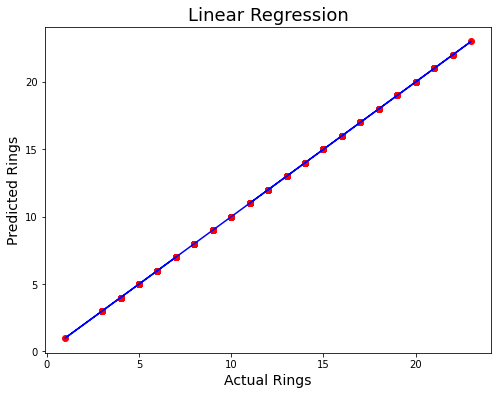

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Rings',fontsize=14)
plt.ylabel('Predicted Rings',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lr.png')
plt.show()

Best fit line is coverning most of the datapoints which shows good fit of our model.

# Regularization:

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [98]:
from sklearn.linear_model import Lasso,Ridge

parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}

ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [99]:
# final model training
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(features_train,target_train)
ls_score_training = ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)
ls_score_training*100

99.99999999042994

In [100]:
pred_ls = ls.predict(features_test)

In [101]:
lss=r2_score(target_test,pred_ls)
lss*100

99.99999999042501

In [109]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

99.99999998820671

Ensemble technique:

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters= {'criterion':['mse','mae','rmse'],'max_features':["auto","sqrt","log2"]}

rf=RandomForestRegressor()
clf= GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [115]:
rf=RandomForestRegressor(criterion='mae',max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print('R2 score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc = rfscore.mean()
print('cross val score:',rfc*100)


R2 score: 99.9801697753545
cross val score: 99.95022198036366


we are getting model accuracy and cross validation score both as 99.9% which shows our model is performing extremely well



In [114]:
import pickle
filename = 'Abalone case study.pkl'
pickle.dump(rf, open(filename, 'wb'))

# conclusion:

In [106]:
loaded_model = pickle.load(open('Abalone case study.pkl','rb'))
result = loaded_model.score(features_test,target_test)
print(result*100)

99.97553530317138


In [107]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['Predicted','Orginal'])


In [108]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,826,827,828,829,830,831,832,833,834,835
Predicted,11.0,16.0,10.0,10.0,11.0,10.0,10.0,9.0,7.0,7.0,...,11.0,7.0,9.0,8.0,7.0,8.0,6.0,9.0,11.0,7.0
Orginal,11.0,16.0,10.0,10.0,11.0,10.0,10.0,9.0,7.0,7.0,...,11.0,7.0,9.0,8.0,7.0,8.0,6.0,9.0,11.0,7.0
